In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
from numpy import isnan

In [2]:
# Display the current workin directory using os.getcwd()
os.getcwd()

'/content'

In [3]:
# os library has a method call listdir which generates a list of files in a directory/folder.
multi_csv = os.listdir()
multi_csv

['.config',
 'MERGED2014_15_PP.csv',
 'MERGED2009_10_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED2013_14_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1999_00_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2006_07_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1998_99_PP.csv',
 'sample_data']

In [4]:
# Use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# Use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

csv_files = [files for files in multi_csv if files.startswith('MERGED')]
csv_files

['MERGED2014_15_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1998_99_PP.csv']

In [5]:
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.

df_list =[]
for filename in csv_files:
    df = pd.read_csv(filename, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    year = filename[6:10]
    df["YEAR"] = int(year)
    df_list.append(df)

In [6]:
merged_df = pd.concat(df_list)
merged_df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
923,135939,Remington College-Tampa Campus,FL,5.0,NaN,22532.0,2002
300,110778,Sofia University,CA,8.0,NaN,NaN,2000
2037,164711,BECKER COLLEGE-LEICESTER,MA,1.0,NaN,NaN,1998
1381,151865,Anabaptist Mennonite Biblical Seminary,IN,3.0,NaN,NaN,2004
5125,415987,Allen School-Jamaica,NY,2.0,NaN,NaN,2012


In [7]:
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6701
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44912 non-null   float64
 5   TUITIONFEE_IN  79195 non-null   float64
 6   YEAR           163331 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 10.0+ MB


In [8]:
merged_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,1.633310e+05,163330.000000,44912.000000,79195.000000,163331.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871,2007.249481
std,4.571721e+06,2.189217,0.217058,9986.003542,6.608266
min,1.006360e+05,0.000000,0.000000,0.000000,1996.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000,2002.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000,2008.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000,2013.000000
max,4.914640e+07,9.000000,1.000000,74787.000000,2018.000000


In [9]:
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

UMBC = merged_df[merged_df["INSTNM"]=='University of Maryland-Baltimore County']
UMBC.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1745,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
1629,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1767,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008


In [10]:
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
UMBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1610 to 1982
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   YEAR           23 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ KB


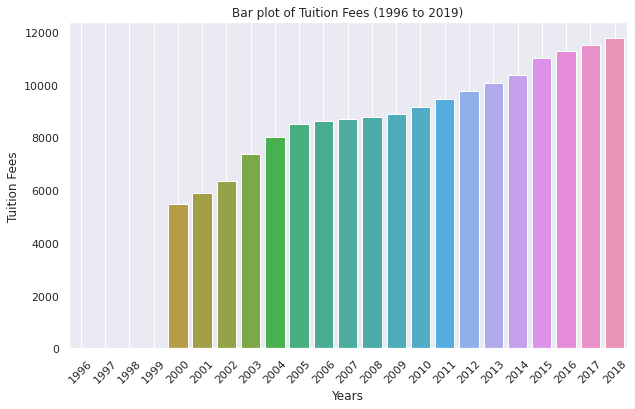

In [11]:
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x ='YEAR', y = 'TUITIONFEE_IN', data=UMBC)
ax.set_title("Bar plot of Tuition Fees (1996 to 2019)")
ax.set_xlabel("Years")
ax.set_ylabel("Tuition Fees")
plt.grid()
plt.xticks(rotation=45);

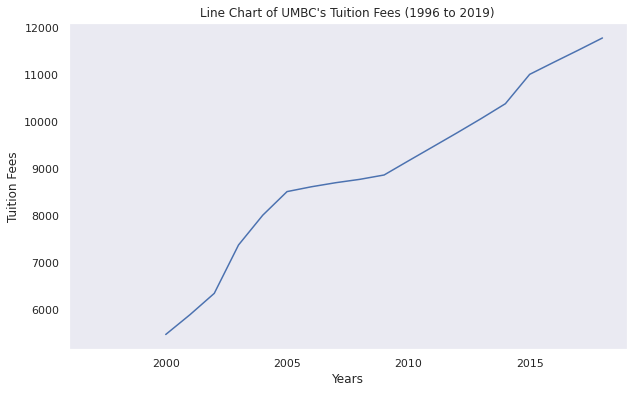

In [12]:
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart
plt.figure(figsize=(10,6))
plt.xlim(1996, 2019)
plt.grid()
ax = sns.lineplot(x ='YEAR', y = 'TUITIONFEE_IN', data=UMBC)
ax.set_title("Line Chart of UMBC's Tuition Fees (1996 to 2019)")
ax.set_xlabel("Years")
ax.set_ylabel("Tuition Fees");


In [13]:
UMBC = UMBC.sort_values("YEAR")
UMBC.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [14]:
# Convert the TUITIONFEE_IN column to a Python List

UMBC_Tuition = UMBC['TUITIONFEE_IN'].tolist()

In [15]:
# Loop through the list and calculate the % change each year over the prior year
Changes = []

for i in range(len(UMBC_Tuition)-1):
  Percent_Change = (UMBC_Tuition[i+1]-UMBC_Tuition[i])/100
  Changes.append(float(Percent_Change))
  i += 1
[0 if isnan(i) else i for i in Changes]  

[0,
 0,
 0,
 0,
 4.2,
 4.52,
 10.26,
 6.32,
 5.0,
 1.02,
 0.86,
 0.72,
 0.92,
 2.99,
 2.96,
 2.97,
 3.04,
 3.16,
 6.22,
 2.58,
 2.54,
 2.6]

In [16]:
UMBC.index

Int64Index([2151, 2049, 1982, 1955, 1926, 1915, 1893, 1873, 1830, 1819, 1799,
            1779, 1767, 1745, 1710, 1694, 1660, 1629, 1610, 1555, 1510, 1478,
            1415],
           dtype='int64')

In [17]:
UMBC.reset_index(drop=True, inplace=True)

In [18]:
UMBC.index

RangeIndex(start=0, stop=23, step=1)

In [19]:
UMBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   YEAR           23 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ KB


In [20]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity
UMBC["PCT_CHANGE"] = pd.DataFrame(Changes)
UMBC.sample(5)


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
19,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015,2.58
20,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016,2.54
12,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008,0.92
6,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,10.26


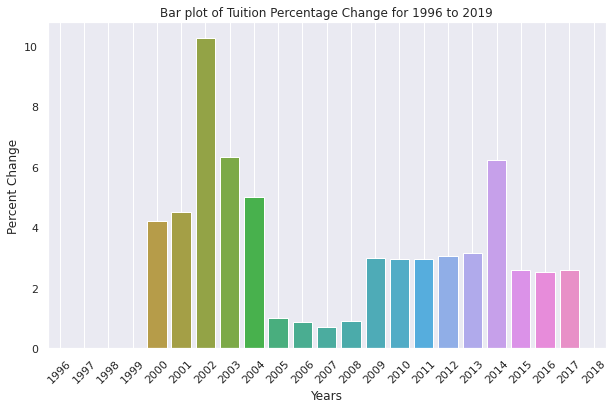

In [21]:
# Plot tuition growth rate year over year - bar first, then line chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x ='YEAR', y = 'PCT_CHANGE', data=UMBC)
ax.set_title("Bar plot of Tuition Percentage Change for 1996 to 2019")
ax.set_xlabel("Years")
ax.set_ylabel("Percent Change")
plt.grid()
plt.xticks(rotation=45);

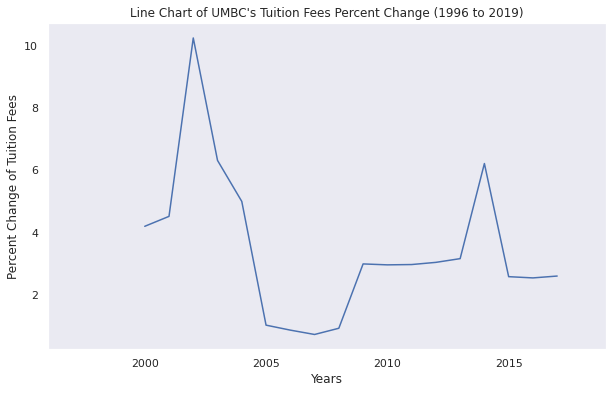

In [22]:
plt.figure(figsize=(10,6))
plt.xlim(1996, 2019)
plt.grid()
ax = sns.lineplot(x ='YEAR', y = 'PCT_CHANGE', data=UMBC)
ax.set_title("Line Chart of UMBC's Tuition Fees Percent Change (1996 to 2019)")
ax.set_xlabel("Years")
ax.set_ylabel("Percent Change of Tuition Fees");


In [23]:
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

JHU = merged_df[merged_df['INSTNM']== "Johns Hopkins University"]
JHU.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1603,162928,Johns Hopkins University,MD,2.0,0.1608,47060.0,2014
1738,162928,Johns Hopkins University,MD,2.0,0.2782,39150.0,2009
1622,162928,Johns Hopkins University,MD,2.0,0.1813,45470.0,2013
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1760,162928,Johns Hopkins University,MD,2.0,0.2609,37700.0,2008


In [24]:
JHU= JHU.sort_values("YEAR")
JHU.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000


In [25]:
# Make a function to Percent Changes for common use

def Percent(school):
  PerChange = []
  TuitFee = school['TUITIONFEE_IN'].tolist()
  for i in range(len(TuitFee)-1):
    Percent_Change = (TuitFee[i+1]-TuitFee[i])/100
    PerChange.append(Percent_Change)
    i += 1
  [0 if isnan(i) else i for i in PerChange]  
  return PerChange
 

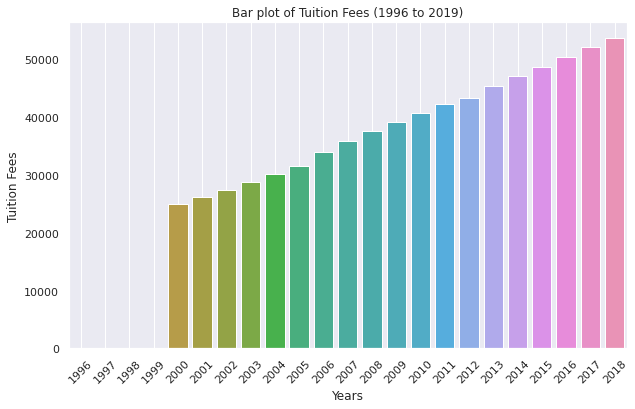

In [26]:
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together
plt.figure(figsize=(10,6))
ax = sns.barplot(x ='YEAR', y = 'TUITIONFEE_IN', data=JHU)
ax.set_title("Bar plot of Tuition Fees (1996 to 2019)")
ax.set_xlabel("Years")
ax.set_ylabel("Tuition Fees")
plt.grid()
plt.xticks(rotation=45);



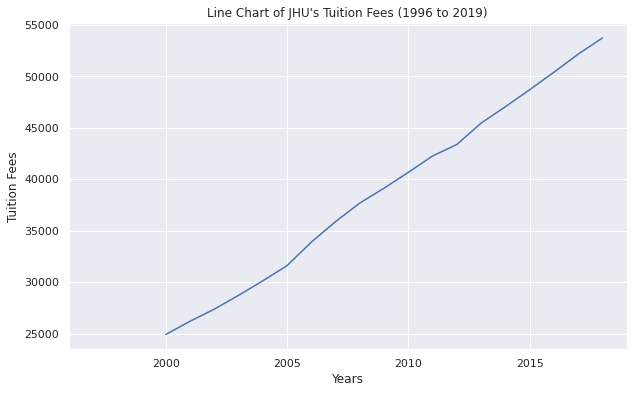

In [27]:
plt.figure(figsize=(10,6))
plt.xlim(1996, 2019)
ax = sns.lineplot(x ='YEAR', y = 'TUITIONFEE_IN', data=JHU)
ax.set_title("Line Chart of JHU's Tuition Fees (1996 to 2019)")
ax.set_xlabel("Years")
ax.set_ylabel("Tuition Fees");

In [28]:
# Calculate the JHU tuition percentge growth using the function defined earlier

jhu = Percent(JHU)
[0 if isnan(i) else i for i in jhu]

[0,
 0,
 0,
 0,
 12.8,
 11.8,
 13.4,
 14.1,
 14.8,
 22.8,
 20.0,
 18.0,
 14.5,
 15.3,
 16.0,
 11.1,
 20.8,
 15.9,
 16.5,
 17.0,
 17.6,
 15.7]

In [29]:
JHU.index

Int64Index([2139, 2039, 1973, 1946, 1917, 1906, 1884, 1865, 1823, 1812, 1792,
            1772, 1760, 1738, 1703, 1687, 1653, 1622, 1603, 1548, 1503, 1473,
            1410],
           dtype='int64')

In [30]:
JHU.reset_index(drop=True, inplace=True)

In [31]:
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

JHU["PCT_CHANGE"] = pd.Series(jhu)
JHU.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
18,162928,Johns Hopkins University,MD,2.0,0.1608,47060.0,2014,16.5
19,162928,Johns Hopkins University,MD,2.0,0.1412,48710.0,2015,17.0
20,162928,Johns Hopkins University,MD,2.0,0.1284,50410.0,2016,17.6
21,162928,Johns Hopkins University,MD,2.0,0.1254,52170.0,2017,15.7
22,162928,Johns Hopkins University,MD,2.0,0.1148,53740.0,2018,NaN


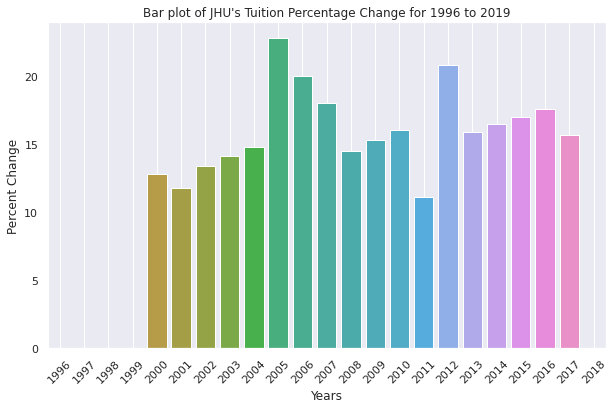

In [32]:
# Make a bar plot of the JHU percentage changes tuitions over time

plt.figure(figsize=(10,6))
ax = sns.barplot(x ='YEAR', y = 'PCT_CHANGE', data=JHU)
ax.set_title("Bar plot of JHU's Tuition Percentage Change for 1996 to 2019")
ax.set_xlabel("Years")
ax.set_ylabel("Percent Change")
plt.grid()
plt.xticks(rotation=45);

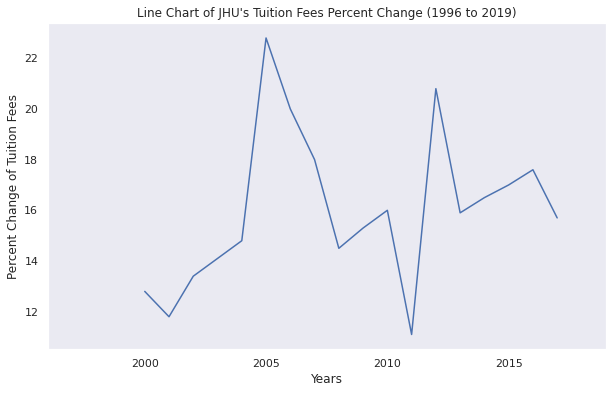

In [33]:
plt.figure(figsize=(10,6))
plt.xlim(1996, 2019)
plt.grid()
ax = sns.lineplot(x ='YEAR', y = 'PCT_CHANGE', data=JHU)
ax.set_title("Line Chart of JHU's Tuition Fees Percent Change (1996 to 2019)")
ax.set_xlabel("Years")
ax.set_ylabel("Percent Change of Tuition Fees");


In [34]:
# Combine the UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR.  Make a umbc2 dataframe with only two columns. 
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,

UMBC['UMBC_PCT']= UMBC['PCT_CHANGE']
umbc2 = UMBC[['YEAR', 'UMBC_PCT']]
umbc2.head(5)

,YEAR,UMBC_PCT
0,1996,NaN
1,1997,NaN
2,1998,NaN
3,1999,NaN
4,2000,4.2


In [35]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge
JHU['JHU_PCT']= JHU['PCT_CHANGE']
jhu2 = JHU[["YEAR","JHU_PCT"]]
jhu2.head(5)

,YEAR,JHU_PCT
0,1996,NaN
1,1997,NaN
2,1998,NaN
3,1999,NaN
4,2000,12.8


In [39]:
# Now, merger the two data frames
# and display the new dataframe
UMBC_JHU = pd.merge(umbc2, jhu2)
UMBC_JHU.tail(5)

,YEAR,UMBC_PCT,JHU_PCT
18,2014,6.22,16.5
19,2015,2.58,17.0
20,2016,2.54,17.6
21,2017,2.60,15.7
22,2018,NaN,NaN


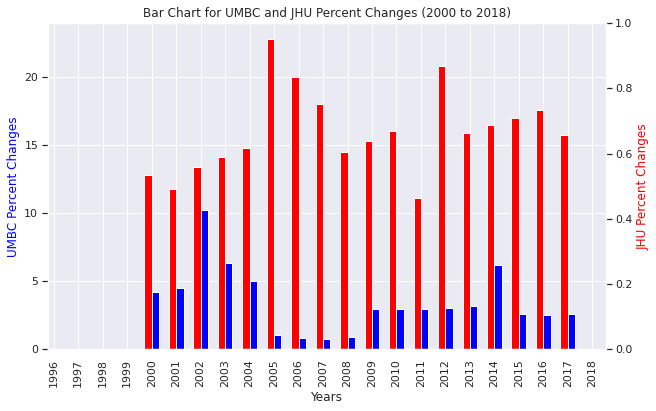

In [40]:
UMBC_JHU = UMBC_JHU.set_index(UMBC_JHU.YEAR)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = .3
UMBC_JHU.JHU_PCT.plot(kind='bar', color='red', ax=ax, width=width, position=1)
UMBC_JHU.UMBC_PCT.plot(kind='bar', color='blue', ax=ax, width=width, position=0)
ax.set_title("Bar Chart for UMBC and JHU Percent Changes (2000 to 2018)")
ax.set_ylabel("UMBC Percent Changes", color='blue')
ax.set_xlabel("Years")
plt.grid()
ax2.set_ylabel("JHU Percent Changes", color='red'),
plt.show()

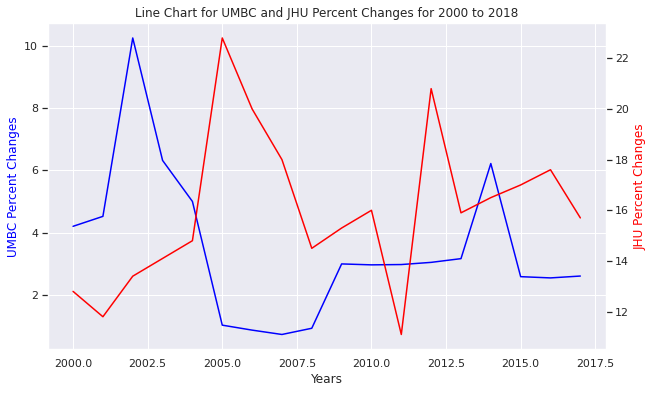

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(UMBC_JHU.YEAR, UMBC_JHU.UMBC_PCT, color='blue')
ax.set_title("Line Chart for UMBC and JHU Percent Changes for 2000 to 2018")
ax.set_ylabel("UMBC Percent Changes", color='blue')
ax.set_xlabel("Years")

ax2 = ax.twinx()
ax2.plot(UMBC_JHU.YEAR, UMBC_JHU.JHU_PCT, color='red')
ax2.set_ylabel("JHU Percent Changes", color='red')
plt.grid()
plt.show()

# **MY OBSERVATION**
- The bar plot for the in state tuition fees for UMBC and JHU shows increases. However, this can be deceiving because JHU's tuition is a lot higher than chart UMBC's tuition. This doesn't take into acccount that JHU doesn't have in state tuition.
- The indiviual line graph for the tuition fees of JHU and UMBC grows linearly.
- When both schools percentage growth were combined in a chart, their differences became more distinct. In comparison, UMBC's percentage change occurs earlier than JHU because of the right shift and the change is proportionally the same before 2010. However, after 2010, JHU percentage change occur earlier and is higher than UMBC's.